## Manim v0.11.0 Release Tour

This interactive worksheet contains an overview over the new features contained in the latest release of the community maintained version of Manim.

In [1]:
from manim import *

config.media_width = "80%"

### [#2075](https://github.com/ManimCommunity/manim/pull/2075): New method: `Mobject.set_default` for changing default values

With the new `set_default` method it is easy to change default arguments for mobjects. For example, `Text.set_default(color=RED)` changes the default color of `Text` to red:

Manim Community v0.18.1

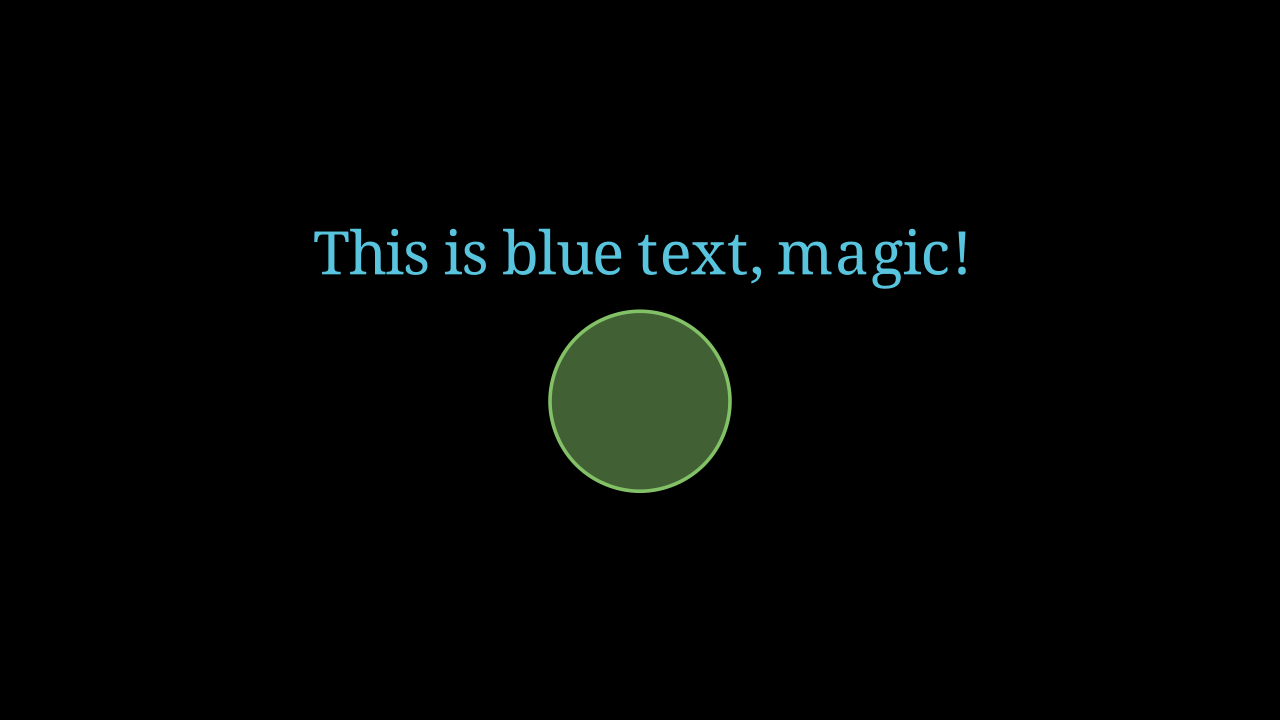

In [2]:
%%manim -qm -v WARNING ChangedDefaultDemo

class ChangedDefaultDemo(Scene):
    def construct(self):
        Text.set_default(color=BLUE)
        t = Text("This is blue text, magic!")
        
        # You can also change multiple arguments at once:
        Circle.set_default(color=GREEN, fill_opacity=0.5)
        c = Circle()
        VGroup(t, c).arrange(DOWN)
        
        self.add(t, c)

        # Call the method without arguments to restore the default behavior!
        Text.set_default()
        Circle.set_default()


### [#2094](https://github.com/ManimCommunity/manim/pull/2094): Implicit function plotting

There is now a new Mobject allowing to plot points that satisfy some equation. Here is an example for the curves defined by $(x^2 + y^2)^2 - 42 (x^2 - y^2) = 0$ (yellow) and $x^3 - x + 1 - y^2 = 0$ (red).

In [3]:
ImplicitFunction?

Init signature:
ImplicitFunction(
    func: 'Callable[[float, float], float]',
    x_range: 'Sequence[float] | None' = None,
    y_range: 'Sequence[float] | None' = None,
    min_depth: 'int' = 5,
    max_quads: 'int' = 1500,
    use_smoothing: 'bool' = True,
    **kwargs,
)
Docstring:     
A vectorized mobject.

Parameters
----------
background_stroke_color
    The purpose of background stroke is to have something
    that won't overlap fill, e.g.  For text against some
    textured background.
sheen_factor
    When a color c is set, there will be a second color
    computed based on interpolating c to WHITE by with
    sheen_factor, and the display will gradient to this
    secondary color in the direction of sheen_direction.
close_new_points
    Indicates that it will not be displayed, but
    that it should count in parent mobject's path
tolerance_for_point_equality
    This is within a pixel
joint_type
    The line joint type used to connect the curve segments
    of this vectoriz

In [4]:
%%manim -qm -v WARNING ImplicitFunctionDemo

import numpy as np

class ImplicitFunctionDemo(Scene):
    def construct(self):
        plane = NumberPlane()
        curve = ImplicitFunction(
            lambda x, y: (x**2 + y**2)**2 - 42*(x**2 - y**2),
            color=YELLOW,
            max_quads=2000,
        )
        self.add(plane)
        self.play(Create(curve))
        self.wait()
        elliptic_curve = ImplicitFunction(
            lambda x, y: x**3 - x + 1 - y**2,
            color=RED,
        )
        self.play(Create(elliptic_curve))
        self.wait()

Manim Community v0.18.1


### [#1991](https://github.com/ManimCommunity/manim/pull/1991): Added support for boolean operations on `VMobject`s

Manim can now compute the union, intersection, and difference of mobjects!

Manim Community v0.18.1

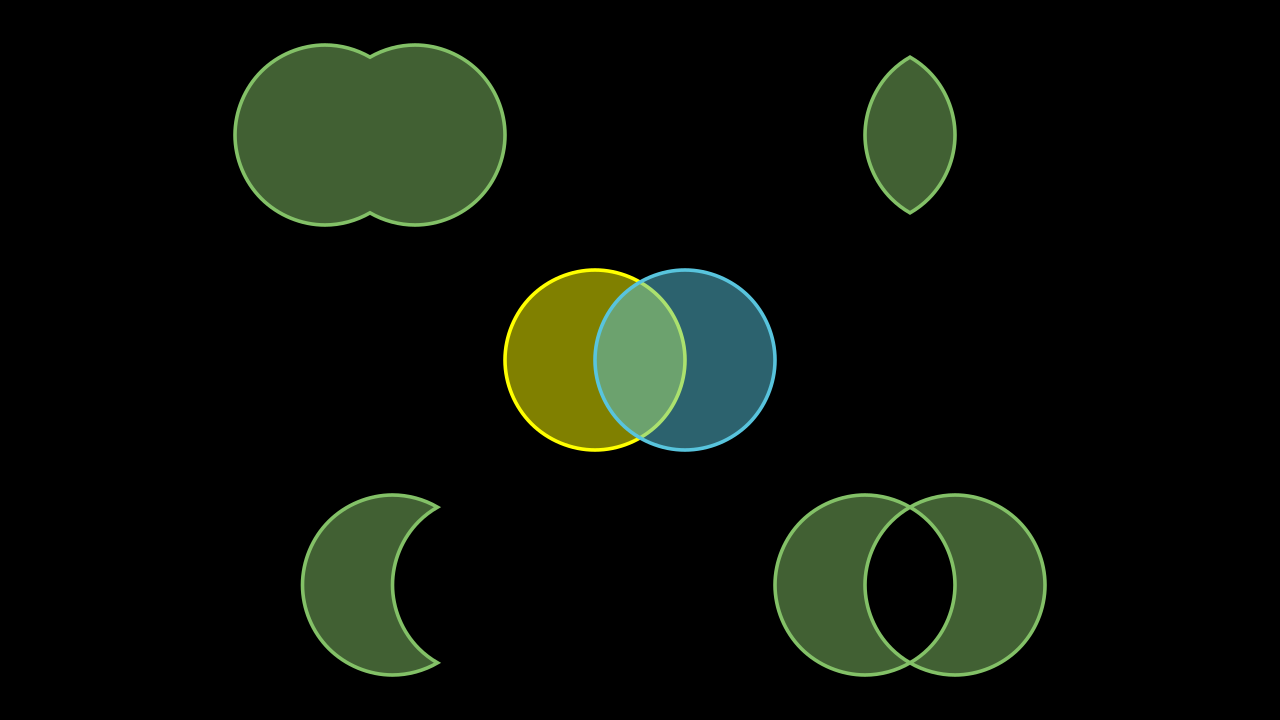

In [5]:
%%manim -qm -v WARNING BooleanOperationDemo

class BooleanOperationDemo(Scene):
    def construct(self):
        VMobject.set_default(color=GREEN, fill_opacity=0.5)
        Circle.set_default(radius=2, fill_opacity=0.5)
        
        c1 = Circle(color=YELLOW).shift(LEFT)
        c2 = Circle(color=BLUE).shift(RIGHT)
        circles = VGroup(c1, c2)
        self.add(circles.scale(0.5))
        
        # Note: changing the default color and fill opacity for VMobject also affects subclasses
        # like Union, Intersection, Difference, and Exclusion.
        grid = VGroup(  
            Union(c1, c2),
            Intersection(c1, c2),
            Difference(c1, c2),
            Exclusion(c1, c2)
        ).arrange_in_grid(2, 2, buff=3)
        self.add(grid)
        
        VMobject.set_default()
        Circle.set_default()

### [#2118](https://github.com/ManimCommunity/manim/pull/2118): Added 3D support for `ArrowVectorField` and `StreamLines`

When passing a `z_range` parameter to `ArrowVectorField` or `StreamLines`, the vector field will be rendered in three dimensions. **Note:** this example takes a bit longer to render.

In [6]:
%%manim -qm -v WARNING --disable_caching ThreeDArrowVectorField

class ThreeDArrowVectorField(ThreeDScene):
    def construct(self):

        def func(p):
            return np.cross(p, np.array([0, 0, p[2]]))

        vector_field = ArrowVectorField(
            func,
            x_range=[-2.5, 2.5, 1],
            y_range=[-2.5, 2.5, 1],
            z_range=[-1.5, 1.5, 1],
        )
        particle = Dot3D(OUT + RIGHT * 2)
        self.add(vector_field, particle)
        particle.add_updater(vector_field.get_nudge_updater(2))
        self.move_camera(PI/3, -PI/4, run_time=3)
        stream_lines = StreamLines(
            func,
            x_range=[-2.5, 2.5, 1.5],
            y_range=[-2.5, 2.5, 1.5],
            z_range=[-1.5, 1.5, 1.5],
        )
        self.play(FadeTransform(vector_field, stream_lines), run_time=0.5)
        self.wait()

Manim Community v0.18.1

To find out more about the exciting new features, fixed bugs, deprecated functions, and other improvements made in Manim v0.11.0, check out the full changelog at <https://docs.manim.community/en/stable/changelog/0.11.0-changelog.html>. Enjoy *manimating*!